# MS 263 Data Analysis Final Project

### Import packages

In [1]:
import pandas as pd
import numpy as np
from make_pca import make_pca
from make_plots import make_plots
from create_datasets import create_datasets
from mean_maker import mean_maker
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from matplotlib import pyplot as plt
import maptools
import cartopy.crs as ccrs

### Read in Data

In [2]:
df = pd.read_csv("alltransects.csv")
df.columns
conditions = [(df['transect'] == 1) | (df['transect'] == 2) | (df['transect'] == 3) | (df['transect'] == 6),
(df['transect'] == 4) | (df['transect'] == 5) | (df['transect'] == 8), (df['transect'] == 9) | (df['transect'] == 7)]
values = ['on', 'off', 'cross']
df['reef'] = np.select(conditions, values)

## Introduction

In November and December of 2014, Dr. Amanda Kahn and colleagues executed a series of ROV dives located west of Vancouver, BC in the Strait of Georgia over the Fraser Ridge Reef (Fig. 1). This location was of specific interest because it is the home to a glass sponge reef. Glass sponges are a class of sponges that are made of four- and six-sided spicules made of silica. They are extremely fragile and the only known reefs exist off the coast of British Columbia and Washington. Prior to their discovery in 1987, sponge reefs were thought to have gone extinct during the Jurassic period (Conway et al., 1991). Sponges are filter feeders and their presence in dense numbers acts to slow currents in the water column. This causes sediment to fall out of the water column and build up around the reef, providing habitat and protection for marine organisms (Krautter et al., 2006). Because of their importance and rarity, Dr. Kahn was curious how the water quality above these reefs changes compared to the water surrounding the reefs. Sponges intake water through the ostia located throughout their body and expel it vertically through the osculum after filtering out food. As a product of this process, the water above sponge reefs is likely to differ in its characteristics from water that is not filtered. Because of the importance of sponge reefs for other organisms, knowing the quality of the water above the reef can have implications for species health and composition. 

In order to answer the question of whether or not water characteristics differ over glass sponge reefs, data from the ROV dives mentioned above can be compared, since some of the  transects followed were over glass sponge reefs while others were not. The ROV dives output three different sets of data. There were dive annotations, which gave qualitative observations along with specific times, latitudes, longitudes, and depths at which these observations occurred. CTD data was also collected giving a specific date, time, and depth as well as water temperature, salinity, oxygen concentration, and pressure. Finally, navigation data from the ROV was also recorded, giving specific information regarding date, time, depth, latitude, longitude, and various ROV velocity and heading data. The navigation data recorded five observations per second, the CTD data recorded one observation per second, and the dive annotations were done qualitatively whenever something of note happened during the dive. In total, nine transects were executed over seven dives. 


/opt/miniconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/miniconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


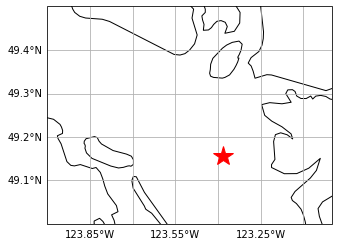

In [3]:
extent = [-124, -123, 49, 49.5]
plt.figure()
ax = maptools.make_map(ccrs.Mercator())
ax.set_extent(extent)
ax.coastlines('10m')
plt.plot(df['longitude'][0], df['latitude'][0], 'r*', ms = 20, transform = ccrs.PlateCarree())

Figure 1. 

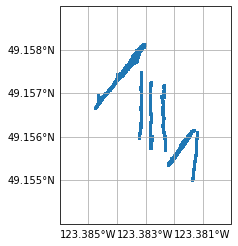

In [4]:
extent2 = [-123.386, -123.38, 49.154, 49.159]
plt.figure()
ax = maptools.make_map(ccrs.Mercator())
ax.set_extent(extent2)
ax.coastlines('10m')
plt.scatter(df['longitude'], df['latitude'], transform = ccrs.PlateCarree(), s=3)

Figure 2

# Methods

Transects were conducted using an ROV and SeaBird CTD during November and December of 2014 in the Georgia Strait between mainland British Columbia and Vancouver Island. Nine transects Transects 1, 2, 3, and 6 were above a glass sponge reef, transects 4, 5, and 8 were above sediment surrounding the reef (non-reef), and transects 7 and 9 were cross-reef transects partially going over a glass sponge reef. After data was collected, there were two datasets, one with CTD data (temperature, oxygen, salinity), and one with navigation data (latitude, longitude, depth, range to bottom). In order to compare environmental variables at different locations, it was necessary to combine these datasets. This was done using the timestamp that was provided in both datasets. Using SQL, the datasets were linked so any given location had an associated set of CTD measurements. 

After data was 

# Results

### Make subsets and figures for each transect

/Users/isaakh/MS263/final_project/create_datasets.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transect_sub['distance'] = numpy_dist*1000


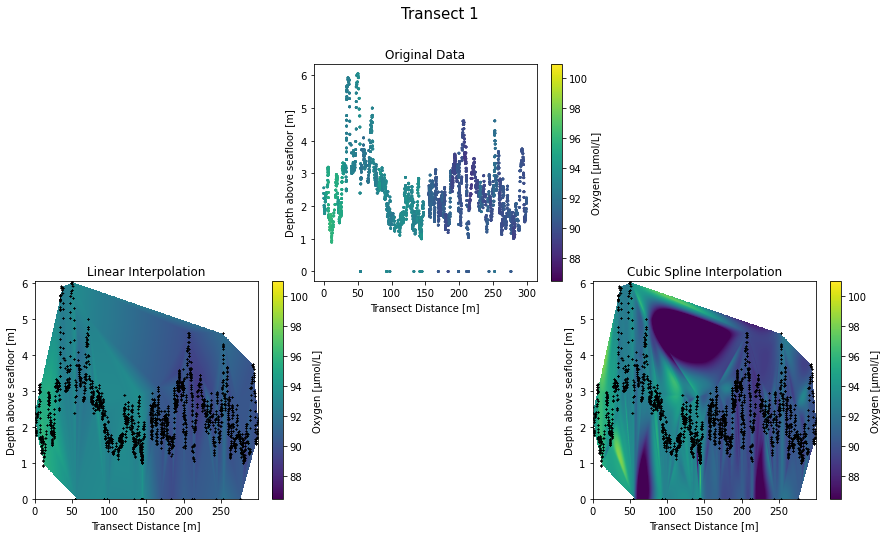

/Users/isaakh/MS263/final_project/create_datasets.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transect_sub['distance'] = numpy_dist*1000


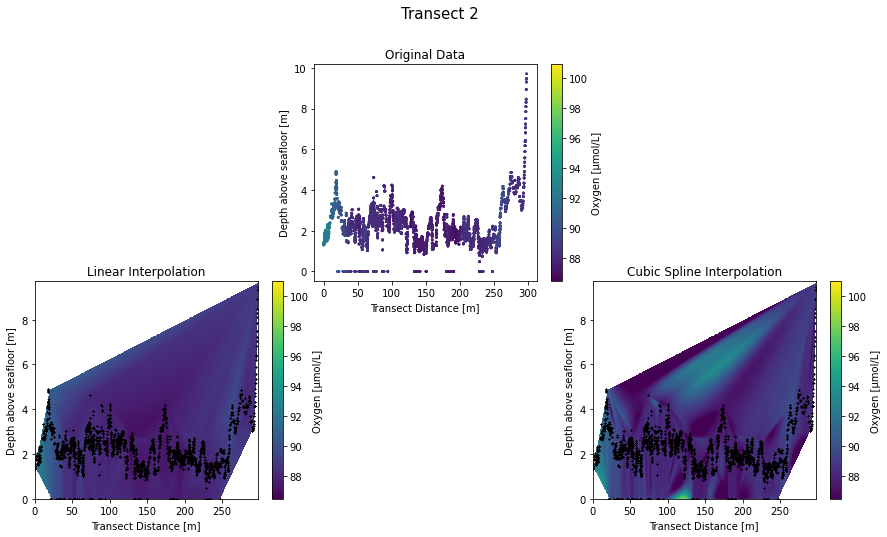

/Users/isaakh/MS263/final_project/create_datasets.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transect_sub['distance'] = numpy_dist*1000


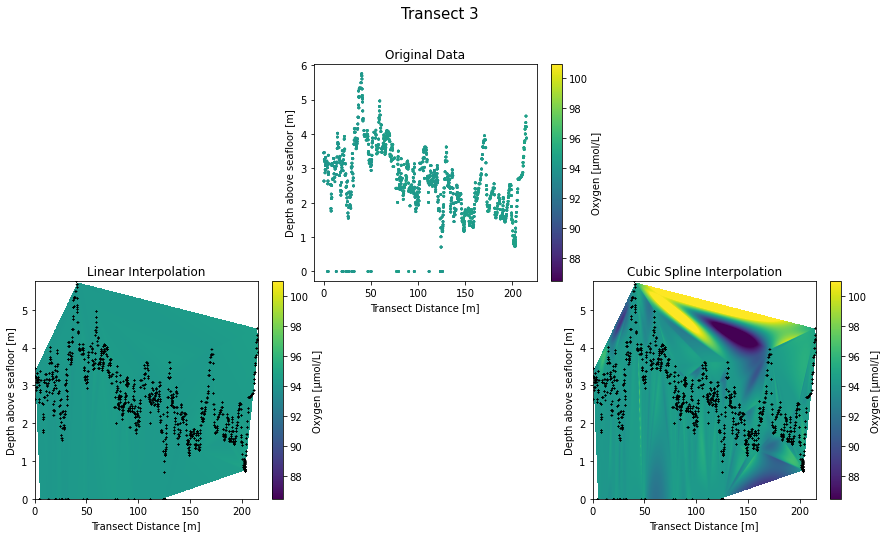

/Users/isaakh/MS263/final_project/create_datasets.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transect_sub['distance'] = numpy_dist*1000


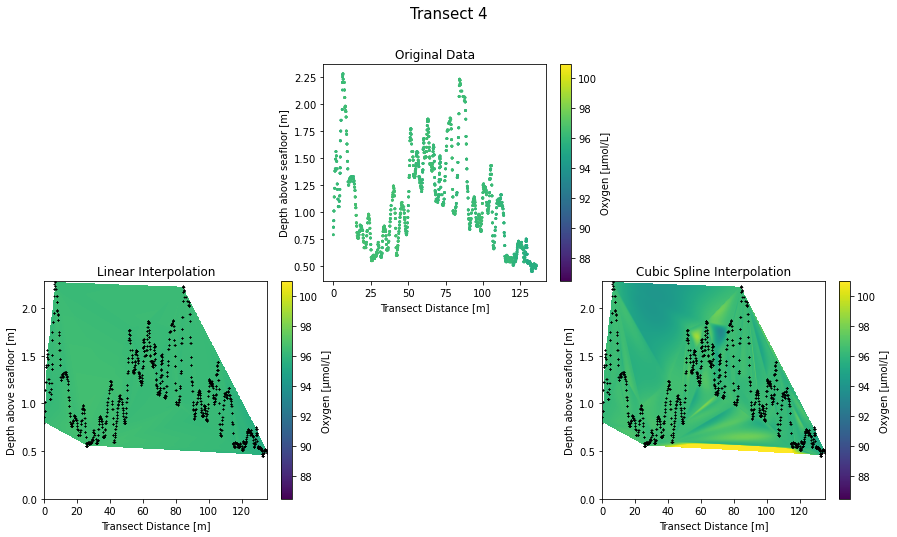

/Users/isaakh/MS263/final_project/create_datasets.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transect_sub['distance'] = numpy_dist*1000


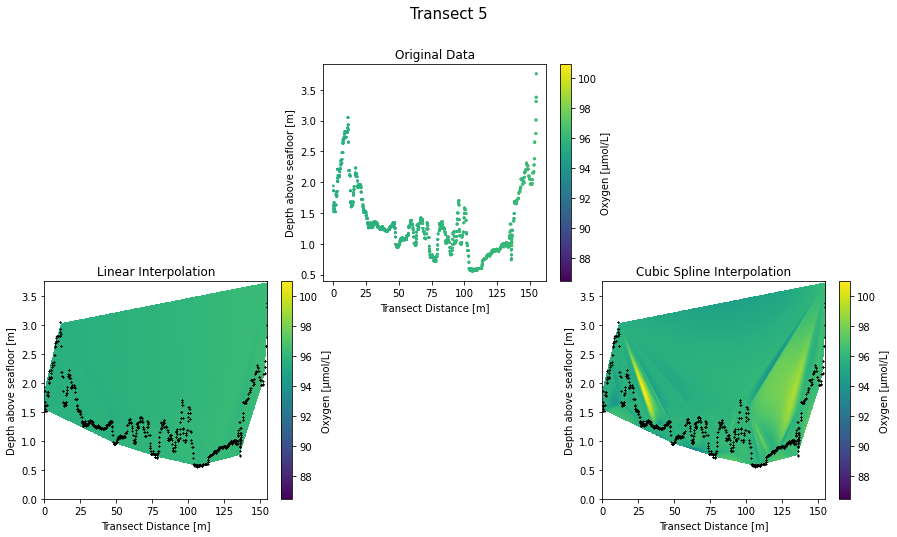

/Users/isaakh/MS263/final_project/create_datasets.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transect_sub['distance'] = numpy_dist*1000


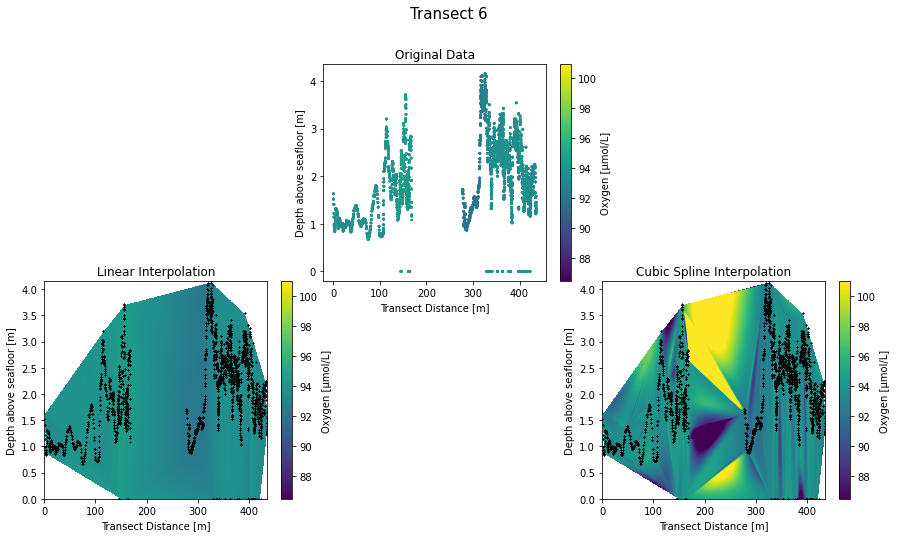

/Users/isaakh/MS263/final_project/create_datasets.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transect_sub['distance'] = numpy_dist*1000


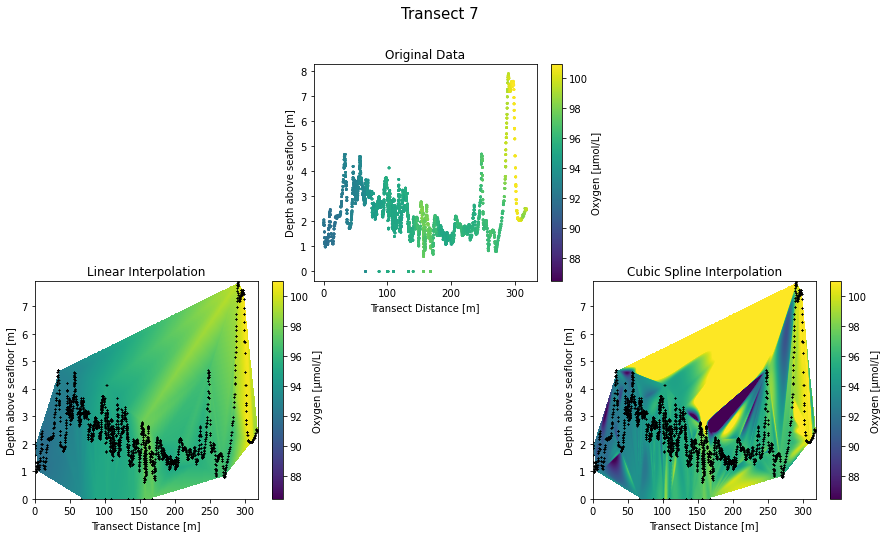

/Users/isaakh/MS263/final_project/create_datasets.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transect_sub['distance'] = numpy_dist*1000


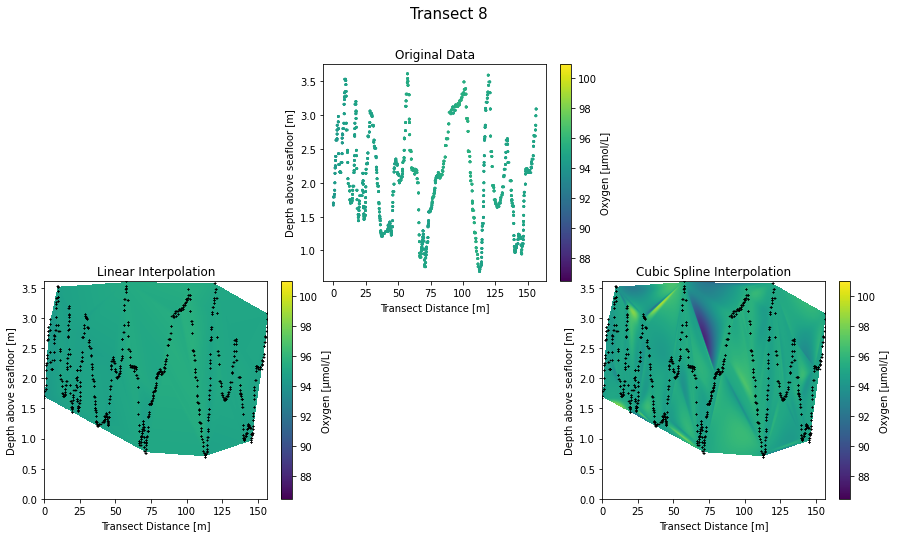

/Users/isaakh/MS263/final_project/create_datasets.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transect_sub['distance'] = numpy_dist*1000


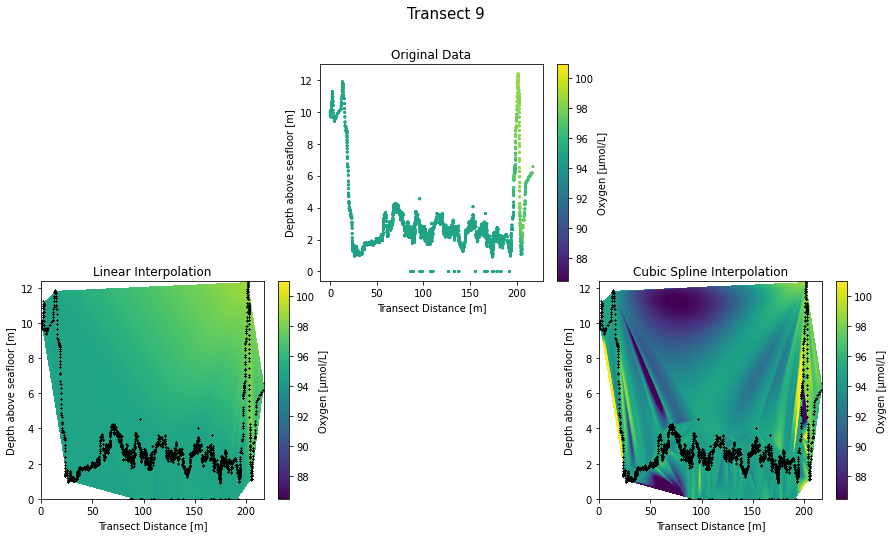

In [5]:
for i in np.unique(df['transect']):
    transect_sub, oxy_interp_linear, oxy_interp_cubic, min_oxy, max_oxy = create_datasets(df, i, 'oxygen')
    make_plots(transect_sub, oxy_interp_linear, oxy_interp_cubic, i, 'oxygen', min_oxy, max_oxy)

## PCA

Eigenvalues: [2.52210602 0.44185003 0.03604395]
Eigenvectors: 
 [[-0.57691993  0.57997967 -0.57514084]
 [ 0.61982411 -0.14772642 -0.7707107 ]
 [ 0.53196003  0.80112452  0.27425906]]
Variance accounted for by PC1: 84.0702005027903 %
Variance accounted for by PC2: 14.728334433655284 %


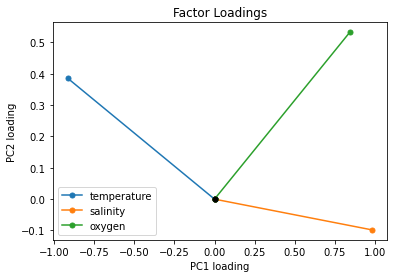

In [6]:
from make_pca import make_pca
make_pca(df, ['temp', 'salinity', 'oxygen'])

## Generalized Linear Models

In order to ensure that each observation was independent prior to model fitting, I averaged each transect's oxygen content and water depth into a new data frame. 

In [7]:
oxy_means, temp_means, sal_means, depth_means, reef_means, transect_list = [], [], [], [], [], []
for i in np.unique(df['transect']):
    transect_sub, oxy_interp_linear, oxy_interp_cubic, min_oxy, max_oxy = create_datasets(df, i, 'oxygen')
    mean_maker(transect_sub, i, oxy_means, temp_means, sal_means, depth_means, reef_means, transect_list)
df_means = pd.DataFrame(list(zip(transect_list, oxy_means, temp_means, sal_means, depth_means, reef_means)), \
                        columns = ['transect', 'oxygen', 'temp', 'salinity', 'depth', 'reef'])

/Users/isaakh/MS263/final_project/create_datasets.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transect_sub['distance'] = numpy_dist*1000


In [8]:
df_means

,transect,oxygen,temp,salinity,depth,reef
0,1,91.775246,9.884354,30.579077,169.153530,['on']
1,2,88.357461,9.862373,30.585515,167.347310,['on']
2,3,94.363929,9.764069,30.987040,166.579668,['on']
3,4,96.226202,9.695069,31.105670,165.322894,['off']
4,5,95.949277,9.674008,31.108254,167.908304,['off']
5,6,93.585514,9.647322,31.096673,168.043915,['on']
6,7,95.418650,9.733173,31.037717,167.207926,['cross']
7,8,94.971295,9.717813,31.050170,169.487428,['off']
8,9,95.215356,9.714794,31.050338,170.906018,['cross']


I calculated many models, but below are the summaries for the three best-fit models:

### Oxygen ~ Reef Condition + Salinity + Depth + Temperature

In [9]:
model_all = smf.ols('oxygen ~ 1 + reef + salinity + depth + temp', data = df_means).fit()
model_all.summary()

/opt/miniconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 oxygen   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     5.599
Date:                Tue, 25 May 2021   Prob (F-statistic):             0.0935
Time:                        14:52:56   Log-Likelihood:                -10.004
No. Observations:                   9   AIC:                             32.01
Df Residuals:                       3   BIC:                             33.19
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -847.9004    528.525     -1.604      0.207   -2529.902     834.101
reef[T.['off']]     0.5305      1.300      0.408      0.711      -3.606       4.667
reef[T.['on']]     -0.4917      1.547     -0.318      0.771      -5.415       4.431
salinity           20.2116      9.429      2.144      0.121      -9.796      50.220
depth               0.1015      0.311      0.326      0.766      -0.890       1.093
temp               30.7088     22.796      1.347      0.271     -41.839     103.256
==============================================================================
Omnibus:                        0.445   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.800   Jarque-Bera (JB):                0.030
Skew:                           0.070   Prob(JB):                        0.985
Kurtosis:                       2.756   Cond. No.                     2.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Oxygen ~ Reef Condition + Salinity

In [10]:
model_reefsal = smf.ols('oxygen ~ 1 + reef + salinity', data = df_means).fit()
model_reefsal.summary()

/opt/miniconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 oxygen   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     9.047
Date:                Tue, 25 May 2021   Prob (F-statistic):             0.0183
Time:                        14:52:56   Log-Likelihood:                -12.139
No. Observations:                   9   AIC:                             32.28
Df Residuals:                       5   BIC:                             33.07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -156.9129     82.887     -1.893      0.117    -369.980      56.154
reef[T.['off']]     0.0411      1.148      0.036      0.973      -2.909       2.992
reef[T.['on']]     -1.4119      1.248     -1.132      0.309      -4.619       1.795
salinity            8.1249      2.670      3.043      0.029       1.262      14.988
==============================================================================
Omnibus:                        0.707   Durbin-Watson:                   2.797
Prob(Omnibus):                  0.702   Jarque-Bera (JB):                0.050
Skew:                          -0.171   Prob(JB):                        0.975
Kurtosis:                       2.867   Cond. No.                     6.16e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Oxygen ~ Salinity

In [11]:
model_sal = smf.ols('oxygen ~ 1 + salinity', data = df_means).fit()
model_sal.summary()

/opt/miniconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 oxygen   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     26.32
Date:                Tue, 25 May 2021   Prob (F-statistic):            0.00135
Time:                        14:52:56   Log-Likelihood:                -13.491
No. Observations:                   9   AIC:                             30.98
Df Residuals:                       7   BIC:                             31.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -226.6881     62.503     -3.627      0.008    -374.485     -78.891
salinity      10.3591      2.019      5.131      0.001       5.585      15.134
==============================================================================
Omnibus:                        1.140   Durbin-Watson:                   2.598
Prob(Omnibus):                  0.565   Jarque-Bera (JB):                0.624
Skew:                          -0.593   Prob(JB):                        0.732
Kurtosis:                       2.491   Cond. No.                     4.73e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

After selecting a model with salinity and reef condition as the best fit, I then plotted the residuals to analyze trends. 

Text(0, 0.5, 'Residuals')

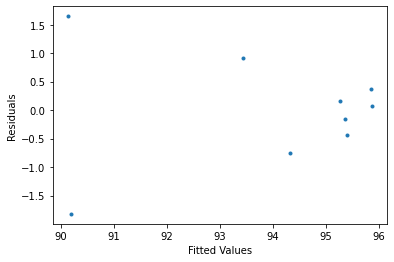

In [12]:
fv = model_reefsal.fittedvalues
resid = model_reefsal.resid
plt.figure()
plt.plot(fv, resid, '.')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")

## Conclusions

## Future Work and Limitations

There are clear limitations in the cubic spline and linear interpolation techniques that cause the data to appear skewed. Cubic spline interpolation is susceptible to over-estimations in areas where there is not nearby data collection. This can be seen in the cubic spline interpolation figures where oxygen content higher than any of the data points are seen in the interpolation areas that are far from data collection locations. Linear interpolation fills in the space between data points in a way that makes more sense (no overestimations), but is still not the most accurate interpolation method. WHY NOT. 

There are two alternative approaches that remedy the visualization problem. The first lies within data collection techniques. As seen in the figures, data across different transects was not collected at uniform depths. Interpolation must be conducted across far vertical and horizontal distances, making visualizations appear messy and potentially inaccurate. In the future, I recommend that data is collected at a uniform depth across all transects. This will also remove depth as a potential predictor for oxygen content between different transects. In transect 8, you can see the data was collected at relatively regular depth intervals (all of which are less than 3.5 m above the seafloor). This has reduced the amount of overestimation that the cubic spline interpolation has done. 

Another solution would be to use the kriging interpolation technique. This technique is difficult to utilize in Python, but would likely be more accurate than the cubic spline and linear interpolations. KRIGING THEORY

In [13]:
import gstools as gs

In [14]:
angle = np.pi / 8
model = gs.Exponential(dim=2, len_scale=[10, 5], angles=angle)
x = y = range(101)
srf = gs.SRF(model, seed=123456)
field = srf((x, y), mesh_type="structured")

## References

Need to reference: matplotlib, scipy, numpy, pandas, physoce + papers

Stable(dim=2, var=1.85, len_scale=7.42, nugget=0.0, alpha=1.09)


/opt/miniconda3/lib/python3.8/site-packages/gstools/covmodel/plot.py:111: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


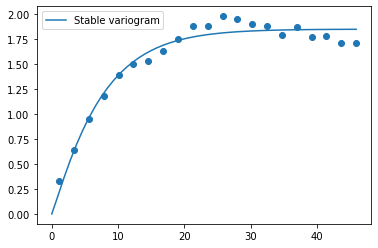

In [15]:
import numpy as np
import gstools as gs
# generate a synthetic field with an exponential model
x = np.random.RandomState(19970221).rand(1000) * 100.
y = np.random.RandomState(20011012).rand(1000) * 100.
model = gs.Exponential(dim=2, var=2, len_scale=8)
srf = gs.SRF(model, mean=0, seed=19970221)
field = srf((x, y))
# estimate the variogram of the field
bin_center, gamma = gs.vario_estimate((x, y), field)
# fit the variogram with a stable model. (no nugget fitted)
fit_model = gs.Stable(dim=2)
fit_model.fit_variogram(bin_center, gamma, nugget=False)
# output
ax = fit_model.plot(x_max=max(bin_center))
ax.scatter(bin_center, gamma)
print(fit_model)